In [0]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


%matplotlib inline
# Define a transform to normalize the data
#transform = transforms.Compose([transforms.ToTensor(),
 #                               transforms.Normalize((0.5,), (0.5,)),
  #                            ])
# Download and load the training data
#trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
#trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [0]:
import pandas as pd
import numpy as np


# Reading the csv file into a pandas DataFrame

url = 'https://raw.githubusercontent.com/engrsmukhtar/AI4EnergyProcessSystems/AI4EPS-1/AI%20Models/model2/10.%20tot%20mass%20w%20H2O-hbrcacabo3-duration-c-zero-based-targets.csv'
data = pd.read_csv(url)

# Printing out some rows from our data
#data[:2]

In [0]:
# Making a copy of our data
processed_data = data[:]


col = processed_data.head()
clmn = list(col) 
#print(clmn) # just to see if the list of columns are correct

# Scale the columns

for c in clmn: 
    # element of column 
    processed_data[c]  = processed_data[c]/processed_data[c].max()
    
#processed_data[:2]


In [0]:
processed_data['Rank']  = data['Rank']        #.to(dtype=torch.long) ##processed_data['Rank']*data['Rank'].max()

#labels = labels.squeeze_()
#labels = labels.to(dtype=torch.long)

#processed_data[:2]

In [43]:
##Splitting the data into Training and Testing


sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
#print(train_data[:2])
#print(test_data[:2])

Number of training samples is 109
Number of testing samples is 13


In [44]:
## Splitting the data into features and targets (labels)
## split the data into features (X) and targets (y).

features = train_data.drop(['Rank'], axis=1)
targets = train_data['Rank']

features_test = test_data.drop(['Rank'], axis=1)
targets_test = test_data['Rank']


features_df = pd.DataFrame(data=features)
features_t = torch.tensor(features_df.values)

targets_df = pd.DataFrame(data=targets)
targets_t = torch.tensor(targets_df.values)


#trainloader_features, trainloader_targets = torch.utils.data.DataLoader(features_t, batch_size=15, shuffle=True), torch.utils.data.DataLoader(targets_t, batch_size=15, shuffle=True)

trainloader_features, trainloader_targets = torch.utils.data.DataLoader(features_t, batch_size=15), torch.utils.data.DataLoader(targets_t, batch_size=15)

print(trainloader_features, trainloader_targets)


<torch.utils.data.dataloader.DataLoader object at 0x7f526d7b1e48> <torch.utils.data.dataloader.DataLoader object at 0x7f526d7b1e80>


In [0]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(21, 15),
                      nn.ReLU(),
                      nn.Linear(15, 12),
                      nn.ReLU(),
                      nn.Linear(12, 6),
                      nn.LogSoftmax(dim=1))

In [46]:
images, labels =  next(iter(trainloader_features)),  (next(iter(trainloader_targets)).squeeze_()).to(dtype=torch.long)


# Define the loss
criterion = nn.NLLLoss()

# Get our data


# Flatten images
images = images.view(images.shape[0], -1)
images = images.float()



# Forward pass, get our logps
logps = model(images)

# Calculate the loss with the logits and the labels
loss = criterion(logps, labels)

print(loss)

#print(images)
print(labels)


tensor(1.7584, grad_fn=<NllLossBackward>)
tensor([0, 1, 1, 0, 4, 0, 4, 1, 0, 0, 2, 1, 0, 1, 0])


In [47]:

print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

#print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None


#Training the NN

# Loop Training

In [48]:
# a feed-forward network

model = nn.Sequential(nn.Linear(21, 15),
                      nn.ReLU(),
                      nn.Linear(15, 12),
                      nn.ReLU(),
                      nn.Linear(12, 6),
                      nn.LogSoftmax(dim=1))



criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.3)

epochs = 100
for e in range(epochs):
    running_loss = 0
#    for images, labels in trainloader:
    for images, labels in zip(trainloader_features, trainloader_targets):
        # Get our data

        # Flatten images
        images = images.view(images.shape[0], -1)
        images = images.float()
        #print(images)

        # Flatten labels
        labels = labels.squeeze_()
        labels = labels.to(dtype=torch.long)
        #print(labels)

        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        #print(output)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/(len(trainloader_features) + len(trainloader_features))}")


Training loss: 0.8464039266109467
Training loss: 0.7695567980408669
Training loss: 0.715690940618515
Training loss: 0.6493118479847908
Training loss: 0.5454181954264641
Training loss: 0.4906071349978447
Training loss: 0.41467614844441414
Training loss: 0.37711382657289505
Training loss: 0.3444548789411783
Training loss: 0.3539896123111248
Training loss: 0.3521590530872345
Training loss: 0.3417347725480795
Training loss: 0.33188955672085285
Training loss: 0.32003710977733135
Training loss: 0.3262748848646879
Training loss: 0.28854121919721365
Training loss: 0.3158404268324375
Training loss: 0.2803252227604389
Training loss: 0.26308279763907194
Training loss: 0.284148414619267
Training loss: 0.3181870151311159
Training loss: 0.25728075485676527
Training loss: 0.2831250159069896
Training loss: 0.24376583378762007
Training loss: 0.2735737459734082
Training loss: 0.2527006473392248
Training loss: 0.253391919657588
Training loss: 0.2390547776594758
Training loss: 0.2367422915995121
Training 

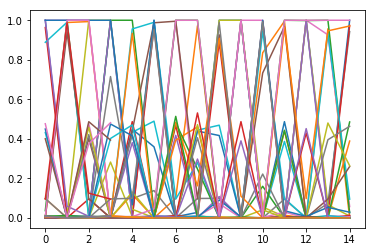

In [53]:
for images, labels in zip(trainloader_features, trainloader_targets):
    # Flatten images
    img = images.view(images.shape[0], -1)
    img = img.float()
    #print(img)

    # Flatten labels
    #labels = labels.squeeze_()
    #labels = labels.to(dtype=torch.long)
    #print(labels)

    # TODO: Training pass
    #optimizer.zero_grad()

    logps = model(img)
    #print(logps)
    #loss = criterion(output, labels)
    
    ps = torch.exp(logps)
    #print(ps)
    plt.plot(ps.data.numpy().squeeze()) #this actually worked. .!.
    


In [0]:
%matplotlib inline
import helper

#images, labels = next(iter(trainloader))
images, labels =  next(iter(trainloader_features)),  (next(iter(trainloader_targets)).squeeze_()).to(dtype=torch.long)


img = images[0].view(1, 21)
img = img.float()
print(img)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
print(ps)
#view_classify(img.view(1, 7, 7), ps)
plt.plot(ps.data.numpy().squeeze())

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable

def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()
    print(ps)

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 21).numpy().squeeze())
    print(img.resize_(1, 21).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(6))
    ax2.set_yticklabels(np.arange(6))
    print(np.arange(6))
    
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [0]:
%matplotlib inline
import helper

#images, labels = next(iter(trainloader))
images, labels =  next(iter(trainloader_features)),  (next(iter(trainloader_targets)).squeeze_()).to(dtype=torch.long)


img = images[0].view(1, 21)
print(img)
img = img.float()

labels = labels.squeeze_()
labels = labels.to(dtype=torch.long)
#print(labels)

# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
print(ps)

#view_classify(img.view(1, 21), ps)

ps = ps.data.numpy().squeeze()
#print(ps)

fig, ax = plt.subplots()


ax.barh(np.arange(6), ps)
ax.set_aspect(0.1)
ax.set_yticks(np.arange(6))
ax.set_yticklabels(np.arange(6))
print(np.arange(6))

ax.set_title('Class Probability')
ax.set_xlim(0, 1.1)

print(np.argmax(ps))  # gets the highest probability index

#processed_data['Rank']  = data['Rank']   
getting_rank  = processed_data['Rank']   


plt.tight_layout()


In [0]:
actual_rank  = processed_data['Rank']

for images, a_rank in zip(trainloader_features, actual_rank):
    # Flatten images
    img = images.view(images.shape[0], -1)
    img = img.float()
    #print(img)


    logps = model(img)

    ps = torch.exp(logps)
    #print(ps)
    ps = ps.data.numpy().squeeze() #this actually worked. .!.
    predicted_rank = np.argmax(ps)
    
    print(a_rank)
    print(predicted_rank)
    
    plt.plot(a_rank, predicted_rank)
    


   



In [0]:
for images, labels in zip(trainloader_features, trainloader_targets):
    # Flatten images
    img = images.view(images.shape[0], -1)
    img = img.float()
    #print(img)

    # Flatten labels
    #labels = labels.squeeze_()
    #labels = labels.to(dtype=torch.long)
    #print(labels)

    # TODO: Training pass
    #optimizer.zero_grad()

    logps = model(img)
    #print(logps)
    #loss = criterion(output, labels)
    
    ps = torch.exp(logps)
    ps = ps.data.numpy().squeeze()
    print(np.argmax(ps))  # gets the highest probability index


    #print(ps)
    #plt.plot(ps.data.numpy().squeeze()) #this actually worked. .!.
    
